## Método del Trapecio

El método del trapecio es una técnica numérica para aproximar la integral definida de una función. La idea principal es dividir el intervalo de integración es pequeños subintervalos y aproximar el área bajo la curva en cada subintervalo como un trapecio.

Supongamos que queremos aproximar la integral definida de una función $f(x)$ en el intervalo $[a, b]$. El método del trapecio utiliza la siguiente definición:

$$\int_{a}^{b} f(x) \,dx \approx \frac{h}{2} \left[ f(a) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(b) \right]$$


donde $h$ es la longitud de cada subintervalo y $n$ es el número total de subintervalos. Los puntos $x_{i}$ representan los extremos de cada subintervalo y se calculan como:

Además, la longitud de cada subintervalo $h$ se calcula como:

$$h = \frac{b - a}{n}$$

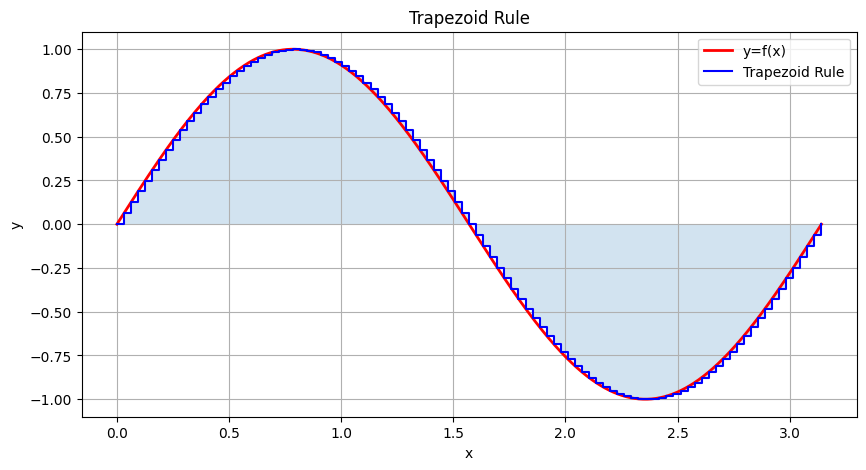

Resultado de la integral (método de la regla del trapecio): -0.000000
Resultado de la integral (scipy.integrate.quad): 0.000000
Diferencia entre los resultados: 0.000000


In [4]:
import numpy as np

from scipy.integrate import quad

import matplotlib.pyplot as plt

def trapezoid_rule(func, a, b, n):
    """
    Approximate the integral of a function using the trapezoid rule.

    Parameters:
    func (function): The function to integrate.
    a (float): The start of the integration interval.
    b (float): The end of the integration interval.
    n (int): The number of subintervals to use for the approximation.

    Returns:
    float: The approximate integral of the function over the interval [a, b].
    """
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    integral = h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))
    return integral


def plot_trapezoid_rule(func, a, b, n):    
    x = np.linspace(a, b, 1000)
    y = func(x)

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'r', linewidth=2, label='y=f(x)')

    xi = np.linspace(a, b, n+1)
    yi = func(xi)

    plt.plot(xi, yi, 'b', drawstyle='steps-post', label='Trapezoid Rule')
    plt.fill_between(xi, yi, step='post', alpha=0.2)

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trapezoid Rule')
    plt.grid(True)
    plt.show()

def main():
    f = lambda x: np.sin(2*x)
    a = 0
    b = np.pi
    n = 100

    plot_trapezoid_rule(f, a, b, n)

    integral_trapezoid = trapezoid_rule(f, a, b, n)
    integral_quad, _ = quad(f, a, b)

    print(f"Resultado de la integral (método de la regla del trapecio): {integral_trapezoid:.6f}")
    print(f"Resultado de la integral (scipy.integrate.quad): {integral_quad:.6f}")

    diferencia = abs(integral_trapezoid - integral_quad)
    print(f"Diferencia entre los resultados: {diferencia:.6f}")

if __name__ == "__main__":
    main()